<a href="https://colab.research.google.com/github/mervekldrm/bioinformatics/blob/main/oct20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

In [2]:
%pip install pydeseq2

In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [4]:
from google.colab import files


uploaded = files.upload()

Saving count_table.csv to count_table (1).csv


In [5]:
import pandas as pd
counts = pd.read_csv('count_table.csv')
counts

,Geneid,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
0,ENSG00000284662,0,0,0,0,0,0,0,0
1,ENSG00000186827,0,0,1,1,4,0,0,3
2,ENSG00000186891,1,0,0,0,0,2,2,2
3,ENSG00000160072,361,427,416,549,328,174,246,202
4,ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...,...
60658,ENSG00000271254,56,55,54,76,47,67,49,53
60659,ENSG00000275987,0,0,1,0,0,0,0,0
60660,ENSG00000268674,0,0,0,0,0,0,0,0
60661,ENSG00000277475,0,0,0,0,0,0,0,0


In [6]:
counts = counts.set_index('Geneid')
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...
ENSG00000271254,56,55,54,76,47,67,49,53
ENSG00000275987,0,0,1,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [7]:
counts = counts[counts.sum(axis = 1) >= 10]
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000225972,6,2,3,4,8,1,3,5
ENSG00000198744,1,494,6,4,624,0,4,3
ENSG00000142611,73,24,54,14,5,11,17,1
...,...,...,...,...,...,...,...,...
ENSG00000276256,74,16,68,28,15,21,28,16
ENSG00000273748,26,50,37,15,40,20,30,13
ENSG00000278384,2,7,6,5,8,2,2,1


In [8]:
counts = counts.T
counts

Geneid,ENSG00000160072,ENSG00000041988,ENSG00000225972,ENSG00000198744,ENSG00000142611,ENSG00000225630,ENSG00000067606,ENSG00000131584,ENSG00000169972,ENSG00000157911,...,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000210196,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000278384,ENSG00000276345,ENSG00000271254
Ctr_s1,361,118,6,1,73,567,23,720,131,189,...,38651,8355,40746,69,4,74,26,2,20,56
Ctr_s2,427,156,2,494,24,948,32,886,174,174,...,70492,15202,64193,91,0,16,50,7,0,55
Ctr_s7,416,124,3,6,54,770,28,884,163,213,...,46768,10682,49172,79,1,68,37,6,0,54
Ctr_s13,549,133,4,4,14,991,17,1015,200,250,...,48152,11229,45907,67,3,28,15,5,0,76
RS_s6,328,101,8,624,5,1723,34,529,115,183,...,60754,13741,62688,130,1,15,40,8,0,47
RS_s9,174,56,1,0,11,358,9,451,81,100,...,25642,5468,23650,42,0,21,20,2,12,67
RS_s12,246,85,3,4,17,731,24,817,140,169,...,38020,8347,36626,77,3,28,30,2,0,49
RS_s16,202,89,5,3,1,1460,31,722,115,102,...,49727,11848,62048,78,0,16,13,1,0,53


In [9]:
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','C', 'RS', 'RS', 'RS', 'RS']),
                        columns = ['Sample', 'Condition'])

In [10]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [11]:
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True
)

#design_factors=["gender", "condition"] = ~ gender + condition

/tmp/ipython-input-306373894.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


condition must be in alphabetical order
control
control
control
reference
reference
or ref =control vericeksin başta ve
control
control
alzheimer(control)

In [12]:
dds.deseq2()


Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.23 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 31.77 seconds.

Fitting LFCs...
... done in 16.08 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [13]:
print(dds)


AnnData object with n_obs × n_vars = 8 × 19611
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'


In [14]:
stat_res = DeseqStats(dds, contrast = ('Condition','RS','C'))


In [15]:
stat_res.summary()


Running Wald tests...


Log2 fold change & Wald test p-value: Condition RS vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
ENSG00000160072  320.478976       -0.492352  0.162466 -3.030497  0.002442   
ENSG00000041988  103.354485       -0.282249  0.164291 -1.717978  0.085801   
ENSG00000225972    3.906585        0.481956  0.829262  0.581187  0.561114   
ENSG00000198744  120.134149        0.569437  2.347768  0.242544       NaN   
ENSG00000142611   23.766114       -1.890190  0.839708 -2.251009  0.024385   
...                     ...             ...       ...       ...       ...   
ENSG00000276256   32.824789       -0.834359  0.614043 -1.358797  0.174211   
ENSG00000273748   27.853508        0.074694  0.457168  0.163384  0.870216   
ENSG00000278384    3.790969       -0.259198  0.850534 -0.304748  0.760558   
ENSG00000276345    4.834095       -0.092254  3.260099 -0.028298  0.977425   
ENSG00000271254   58

... done in 4.85 seconds.



In [16]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000160072,320.478976,-0.492352,0.162466,-3.030497,0.002442,0.030179
ENSG00000041988,103.354485,-0.282249,0.164291,-1.717978,0.085801,0.326927
ENSG00000225972,3.906585,0.481956,0.829262,0.581187,0.561114,NaN
ENSG00000198744,120.134149,0.569437,2.347768,0.242544,NaN,NaN
ENSG00000142611,23.766114,-1.890190,0.839708,-2.251009,0.024385,0.152177
...,...,...,...,...,...,...
ENSG00000276256,32.824789,-0.834359,0.614043,-1.358797,0.174211,0.477559
ENSG00000273748,27.853508,0.074694,0.457168,0.163384,0.870216,0.957194
ENSG00000278384,3.790969,-0.259198,0.850534,-0.304748,0.760558,NaN


In [17]:
stat_res.results_df.to_csv("results.csv")


In [18]:
%pip install sanbomics


In [19]:
from sanbomics.tools import id_map
gene_mapper = id_map(species = 'human')

In [20]:
res['Symbol'] = res.index.map(gene_mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.478976,-0.492352,0.162466,-3.030497,0.002442,0.030179,ATAD3B
ENSG00000041988,103.354485,-0.282249,0.164291,-1.717978,0.085801,0.326927,THAP3
ENSG00000225972,3.906585,0.481956,0.829262,0.581187,0.561114,NaN,MTND1P23
ENSG00000198744,120.134149,0.569437,2.347768,0.242544,NaN,NaN,MTCO3P12
ENSG00000142611,23.766114,-1.890190,0.839708,-2.251009,0.024385,0.152177,PRDM16
...,...,...,...,...,...,...,...
ENSG00000276256,32.824789,-0.834359,0.614043,-1.358797,0.174211,0.477559,AC011043.1
ENSG00000273748,27.853508,0.074694,0.457168,0.163384,0.870216,0.957194,AL592183.1
ENSG00000278384,3.790969,-0.259198,0.850534,-0.304748,0.760558,NaN,AL354822.1


<0.05 looking for meaningful

In [21]:
sig_genes = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 1)]
sig_genes


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.439849,1.135179,0.273025,4.157779,3.213561e-05,0.001172,KCNAB2
ENSG00000116254,16.686399,2.714644,0.678478,4.001080,6.305404e-05,0.002002,CHD5
ENSG00000198830,1111.166164,-1.207840,0.328792,-3.673569,2.391861e-04,0.005693,HMGN2
ENSG00000134690,301.526204,-2.171315,0.388433,-5.589938,2.271513e-08,0.000006,CDCA8
ENSG00000158008,29.188005,2.883361,0.836231,3.448042,5.646673e-04,0.010581,EXTL1
...,...,...,...,...,...,...,...
ENSG00000099957,41.647383,1.376762,0.481767,2.857735,4.266765e-03,0.045141,P2RX6
ENSG00000025770,276.073018,-1.163673,0.243073,-4.787346,1.690013e-06,0.000128,NCAPH2
ENSG00000159259,114.850083,-1.795565,0.464533,-3.865312,1.109472e-04,0.003156,CHAF1B


In [26]:
%pip install scanpy as scp


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [23]:
dds


AnnData object with n_obs × n_vars = 8 × 19611
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [27]:
scp.tl.pca(dds)


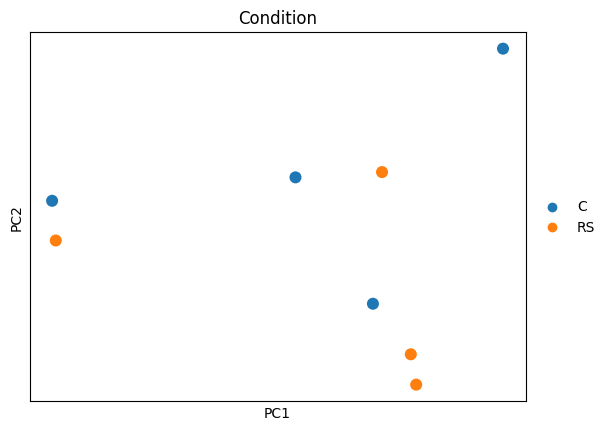

In [28]:
scp.pl.pca(dds, color = 'Condition', size = 300)


In [29]:
%pip install gseapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 14.0 MB/s eta 0:00:00


In [30]:
import gseapy as gp
from gseapy.plot import gseaplot


In [36]:
res
ranking = res[['Symbol', 'padj']].dropna().sort_values('padj', ascending = True)
ranking

,Symbol,padj
Geneid,,
ENSG00000213281,NRAS,3.436416e-15
ENSG00000261115,TMEM178B,1.234800e-14
ENSG00000145390,USP53,4.372848e-14
ENSG00000182963,GJC1,1.785692e-11
ENSG00000106366,SERPINE1,2.149403e-10
...,...,...
ENSG00000103254,ANTKMT,9.997181e-01
ENSG00000090520,DNAJB11,9.997181e-01
ENSG00000133983,COX16,9.997181e-01


In [32]:
ranking = ranking.drop_duplicates('Symbol')
ranking

,Symbol,padj
Geneid,,
ENSG00000213281,NRAS,3.436416e-15
ENSG00000261115,TMEM178B,1.234800e-14
ENSG00000145390,USP53,4.372848e-14
ENSG00000182963,GJC1,1.785692e-11
ENSG00000106366,SERPINE1,2.149403e-10
...,...,...
ENSG00000103254,ANTKMT,9.997181e-01
ENSG00000090520,DNAJB11,9.997181e-01
ENSG00000133983,COX16,9.997181e-01


In [33]:
manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}
#to look at available libraries
#gp.get_library_name()

In [34]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

2025-11-20 08:34:51,406 [WARNING] Duplicated values found in preranked stats: 50.86% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [35]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__DNA unwinding invo...,0.000000,-0.454565,-1.916811
1,GO_Biological_Process_2021__DNA strand elongat...,0.000000,-0.786111,-3.036832
2,GO_Biological_Process_2021__protein localizati...,0.000000,-0.638715,-2.659664
3,GO_Biological_Process_2021__purine ribonucleos...,0.036765,-0.300283,-1.488997
4,GO_Biological_Process_2021__DNA damage checkpo...,0.217647,-0.268622,-1.297191
...,...,...,...,...
2248,GO_Biological_Process_2021__regulation of syna...,1.000000,0.328020,0.999200
2249,GO_Biological_Process_2021__positive regulatio...,1.000000,0.251118,0.951485
2250,GO_Biological_Process_2021__renal system devel...,1.000000,0.206488,0.697898
2251,GO_Biological_Process_2021__regulation of RIG-...,1.000000,0.349264,1.035351


In [37]:
out_df[0:11]
out_df.iloc[0].Term

'GO_Biological_Process_2021__DNA unwinding involved in DNA replication (GO:0006268)'

In [38]:
import numpy as np
import seaborn as sns

In [39]:
dds.layers['normed_counts']


array([[359.20778217, 117.41417811,   5.97021245, ...,   1.99007082,
         19.90070815,  55.72198283],
       [326.25451222, 119.19368596,   1.52812418, ...,   5.34843463,
          0.        ,  42.02341492],
       [361.89284033, 107.87190433,   2.60980414, ...,   5.21960827,
          0.        ,  46.97647447],
       ...,
       [272.19478414,  87.60291903,   1.56433784, ...,   3.12867568,
         18.77205408, 104.81063527],
       [256.62685762,  88.6718817 ,   3.12959582, ...,   2.08639722,
          0.        ,  51.1167318 ],
       [238.29366766, 104.99077436,   5.89835811, ...,   1.17967162,
          0.        ,  62.52259597]])

In [40]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])


In [41]:
dds.layers['log1p']


array([[5.88668104, 4.77418846, 1.9416457 , ..., 1.09529707, 3.03978304,
        4.03816184],
       [5.79073819, 4.78910449, 0.9274776 , ..., 1.84820827, 0.        ,
        3.7617445 ],
       [5.89410758, 4.690172  , 1.28365352, ..., 1.82770693, 0.        ,
        3.87071078],
       ...,
       [5.61018504, 4.4841648 , 0.94170029, ..., 1.4179567 , 2.98426953,
        4.66165104],
       [5.55151225, 4.49615725, 1.41817954, ..., 1.12700446, 0.        ,
        3.95348605],
       [5.47769153, 4.66335206, 1.93128343, ..., 0.77917423, 0.        ,
        4.15139568]])

In [42]:
sig_genes


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.439849,1.135179,0.273025,4.157779,3.213561e-05,0.001172,KCNAB2
ENSG00000116254,16.686399,2.714644,0.678478,4.001080,6.305404e-05,0.002002,CHD5
ENSG00000198830,1111.166164,-1.207840,0.328792,-3.673569,2.391861e-04,0.005693,HMGN2
ENSG00000134690,301.526204,-2.171315,0.388433,-5.589938,2.271513e-08,0.000006,CDCA8
ENSG00000158008,29.188005,2.883361,0.836231,3.448042,5.646673e-04,0.010581,EXTL1
...,...,...,...,...,...,...,...
ENSG00000099957,41.647383,1.376762,0.481767,2.857735,4.266765e-03,0.045141,P2RX6
ENSG00000025770,276.073018,-1.163673,0.243073,-4.787346,1.690013e-06,0.000128,NCAPH2
ENSG00000159259,114.850083,-1.795565,0.464533,-3.865312,1.109472e-04,0.003156,CHAF1B


In [44]:
dds_sig_genes = dds[:, sig_genes.index]
dds_sig_genes


View of AnnData object with n_obs × n_vars = 8 × 626
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [45]:
grapher = pd.DataFrame(dds_sig_genes.layers['log1p'].T,
                       index=dds_sig_genes.var_names, columns=dds_sig_genes.obs_names)


heatmap -> unsupervised clustering
üstteki çizgiler sample clustering
soldaki gene clustering

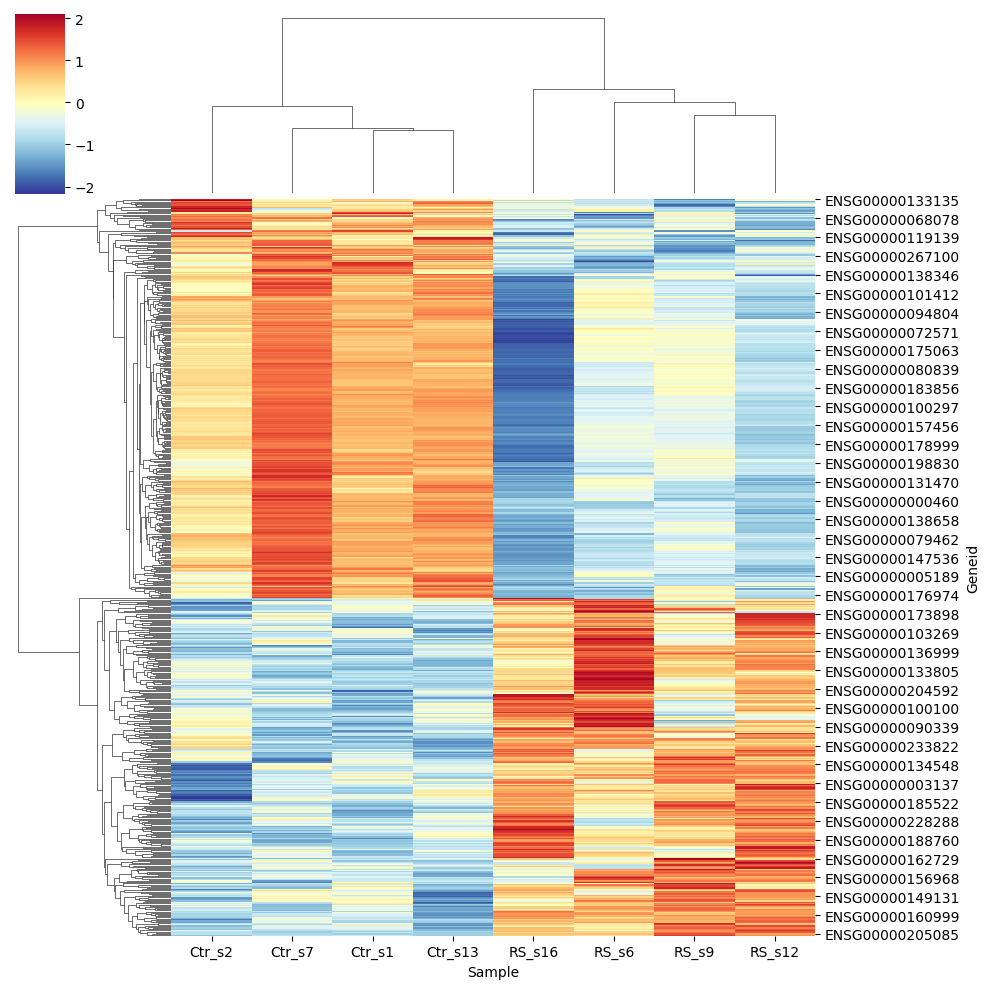

In [46]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')


In [47]:
from sanbomics.plots import volcano


In [48]:
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.478976,-0.492352,0.162466,-3.030497,0.002442,0.030179,ATAD3B
ENSG00000041988,103.354485,-0.282249,0.164291,-1.717978,0.085801,0.326927,THAP3
ENSG00000225972,3.906585,0.481956,0.829262,0.581187,0.561114,NaN,MTND1P23
ENSG00000198744,120.134149,0.569437,2.347768,0.242544,NaN,NaN,MTCO3P12
ENSG00000142611,23.766114,-1.890190,0.839708,-2.251009,0.024385,0.152177,PRDM16
...,...,...,...,...,...,...,...
ENSG00000276256,32.824789,-0.834359,0.614043,-1.358797,0.174211,0.477559,AC011043.1
ENSG00000273748,27.853508,0.074694,0.457168,0.163384,0.870216,0.957194,AL592183.1
ENSG00000278384,3.790969,-0.259198,0.850534,-0.304748,0.760558,NaN,AL354822.1


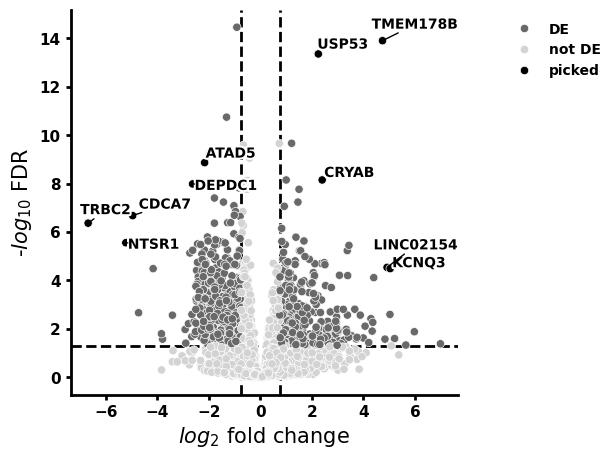

In [49]:
volcano(res, symbol='Symbol')
